**Question No :1**

In [1]:
#Find the outliers in given csv file

In [2]:
import pandas as pd
import os
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
os.getcwd()

'/home/tzuser'

In [4]:
os.chdir('/home/tzuser/Public/sriram/AIML-master/AI-ML-Aug-2020/Day-17')

In [5]:
cars = pd.read_csv("mtcars.csv")

In [6]:
cars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [7]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


**In mpg, the outliers are**

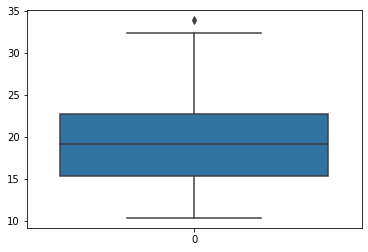

In [8]:
sns.boxplot(data=cars['mpg'])

In [47]:
outlier_in_mpg=[]
zscore_mpg = stats.zscore(cars['mpg'])
print(zscore_mpg)
outlier_in_mpg = cars.mpg[np.logical_or(zscore_mpg>2 , zscore_mpg<-2)]

[ 0.15329914  0.15329914  0.4567366   0.22072968 -0.23442651 -0.33557233
 -0.97616253  0.72645879  0.4567366  -0.15013833 -0.38614524 -0.62215216
 -0.47043343 -0.8244438  -1.63361037 -1.63361037 -0.90873199  2.07506974
  1.737917    2.32793429  0.23758732 -0.77387089 -0.8244438  -1.1447389
 -0.15013833  1.21533026  0.99618098  1.737917   -0.72329798 -0.06585014
 -0.85815908  0.22072968]


In [49]:
outlier_in_mpg

17    32.4
19    33.9
Name: mpg, dtype: float64

**In cyl**

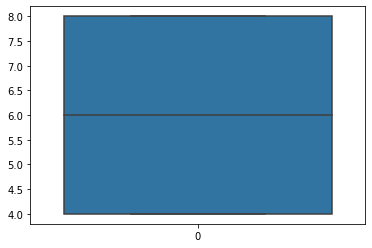

In [11]:
sns.boxplot(data=cars['cyl'])

No outlier in cyl in car dataset

**In Disp**

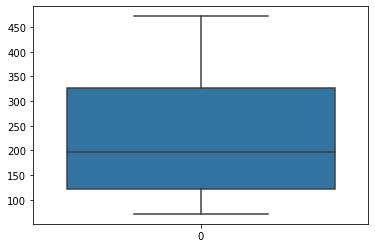

In [12]:
sns.boxplot(data=cars['disp'])

There is no outliers in Disp

**In hp**

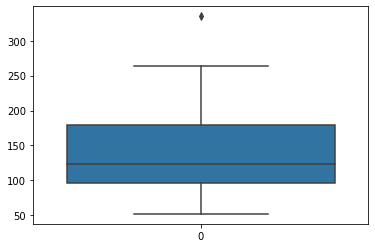

In [13]:
sns.boxplot(data=cars['hp'])

In [14]:
#one outlier are there

outlier_in_hp=[]
zscore_hp = stats.zscore(cars['hp'])
print(zscore_hp)
outlier_in_hp = cars.hp[np.logical_or(zscore_hp>2 , zscore_hp<-2)] 

[-0.54365487 -0.54365487 -0.7955699  -0.54365487  0.41954967 -0.61774753
  1.45684686 -1.25494437 -0.76593284 -0.35101396 -0.35101396  0.49364233
  0.49364233  0.49364233  0.86410561  1.01229092  1.23456889 -1.19567025
 -1.40312969 -1.21048878 -0.73629578  0.04908639  0.04908639  1.45684686
  0.41954967 -1.19567025 -0.82520696 -0.49919927  1.73839896  0.41954967
  2.79051468 -0.5584734 ]


In [15]:
outlier_in_hp

30    335
Name: hp, dtype: int64

**In drat**

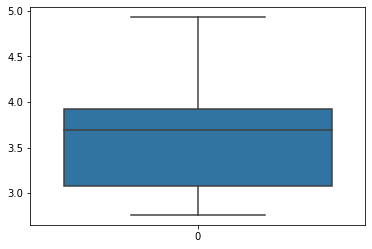

In [16]:
sns.boxplot(data=cars['drat'])

No outlier

**In wt**

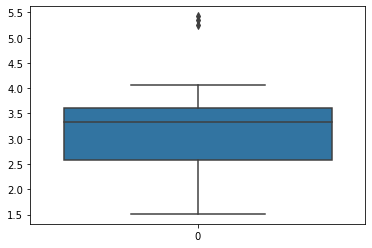

In [17]:
sns.boxplot(data=cars['wt'])

In [18]:
#outliers are there

outlier_in_wt=[]
zscore_wt = stats.zscore(cars['wt'])
print(zscore_wt)
outlier_in_wt = cars.wt[np.logical_or(zscore_wt>2 , zscore_wt<-2)] 

[-0.62016658 -0.35538219 -0.93167763 -0.00233633  0.23129695  0.25206436
  0.36628508 -0.02829559 -0.06983039  0.23129695  0.23129695  0.88547016
  0.5324243   0.58434281  2.11074695  2.29142336  2.20939212 -1.05628205
 -1.6637286  -1.43528716 -0.78111396  0.31436657  0.2261051   0.64664502
  0.65183687 -1.33145014 -1.11858426 -1.76964235 -0.04906299 -0.46441106
  0.36628508 -0.45402735]


In [19]:
outlier_in_wt

14    5.250
15    5.424
16    5.345
Name: wt, dtype: float64

**In qsec**

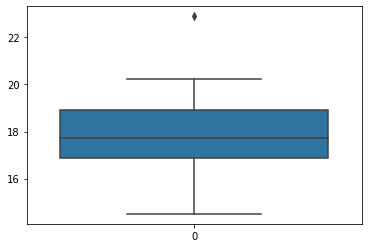

In [20]:
sns.boxplot(data=cars['qsec'])

In [21]:
#there is an outlier

outlier_in_qsec=[]
zscore_qsec = stats.zscore(cars['qsec'])
print(zscore_qsec)
outlier_in_qsec = cars.qsec[np.logical_or(zscore_qsec>2 , zscore_qsec<-2)] 

[-0.78960058 -0.47120178  0.43282336  0.90473586 -0.47120178  1.34821989
 -1.14211353  1.22313465  2.87198554  0.25656688  0.59770845 -0.25514546
 -0.14143161  0.0859961   0.07462472 -0.01634637 -0.24377408  0.92179293
  0.38165212  1.16627772  1.22882034 -0.55648718 -0.31200239 -1.38659831
 -0.45414471  0.59770845 -0.65314395 -0.5394301  -1.90399635 -1.33542708
 -1.84713942  0.42713767]


In [22]:
outlier_in_qsec

8    22.9
Name: qsec, dtype: float64

**In vs**

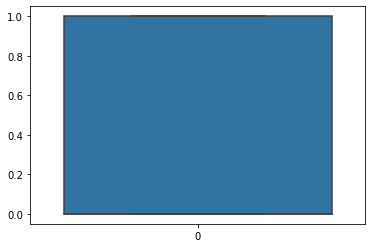

In [23]:
sns.boxplot(data=cars['vs'])

No outlier

**In am**

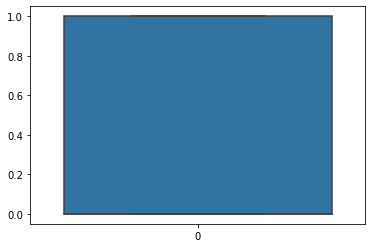

In [24]:
sns.boxplot(data=cars['am'])

No outler

**In gear**

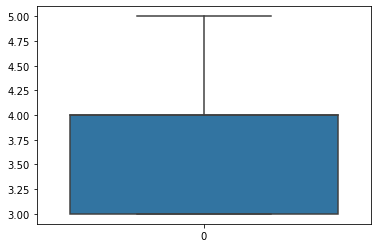

In [25]:
sns.boxplot(data=cars['gear'])

No outlier

**In carb**

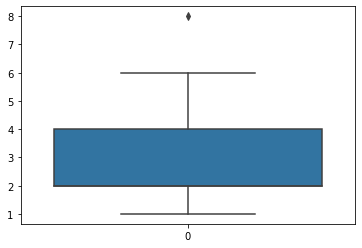

In [26]:
sns.boxplot(data=cars['carb'])

In [27]:
#outlier are there

outlier_in_carb=[]
zscore_carb = stats.zscore(cars['carb'])
print(zscore_carb)
outlier_in_carb = cars.carb[np.logical_or(zscore_carb>2 , zscore_carb<-2)] 

[ 0.74696708  0.74696708 -1.14010764 -1.14010764 -0.51108274 -1.14010764
  0.74696708 -0.51108274 -0.51108274  0.74696708  0.74696708  0.11794217
  0.11794217  0.11794217  0.74696708  0.74696708  0.74696708 -1.14010764
 -0.51108274 -1.14010764 -1.14010764 -0.51108274 -0.51108274  0.74696708
 -0.51108274 -1.14010764 -0.51108274 -0.51108274  0.74696708  2.00501689
  3.26306671 -0.51108274]


In [28]:
outlier_in_carb

29    6
30    8
Name: carb, dtype: int64

**Question No 2**

In [29]:
#Get the boston dataset from sklearn,find out the Outlier and treat them.

In [30]:
from sklearn.datasets import load_boston

In [31]:
boston = load_boston()

In [32]:
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [33]:
data = boston.data
target = boston.target
columns = boston.feature_names

In [34]:
#convert data into dataframe

dataframe1 = pd.DataFrame(data=data,columns=columns)

In [35]:
dataframe1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [36]:
dataframe1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [37]:
z_score = stats.zscore(dataframe1)

In [38]:
z_score.shape

(506, 13)

In [39]:
outliers = dataframe1[np.logical_or((z_score<-3),(z_score>3))]

In [40]:
outliers.index

Int64Index([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
            200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
            220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
            277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
            357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
            380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
            416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
            437, 438, 445, 450, 454, 455, 456, 457, 466],
           dtype='int64')

In [41]:
dataframe1.iloc[outliers.index]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77
57,0.01432,100.0,1.32,0.0,0.411,6.816,40.5,8.3248,5.0,256.0,15.1,392.90,3.95
102,0.22876,0.0,8.56,0.0,0.520,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71
455,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13
456,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24.0,666.0,20.2,10.48,19.01
457,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24.0,666.0,20.2,3.50,16.94


In [42]:
#Drop outliers

dataframe1.drop(outliers.index)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
